In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)

from randnn import ContinuousNN, get_lyapunov_spectrum
from randnn.plotting import plot_trajectory_avg, plot_random_matrix_spectrum

In [2]:
COUPLING_STRENGTH = 10
N_NEURONS = 1000

In [3]:
cont_nn = ContinuousNN(coupling_strength=COUPLING_STRENGTH, n_dofs=N_NEURONS, max_step=0.001)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
/Users/Jesse/Projects/masters-thesis/code/randnn/randnn/plotting.py:40: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle((0, 0),


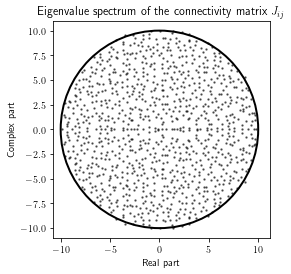

In [4]:
# Plot the eigenvalue spectrum and make sure it respects Girko's circular law
plot_random_matrix_spectrum(cont_nn.coupling_matrix, COUPLING_STRENGTH)

In [ ]:
trajectory = cont_nn.run_or_load(n_steps=10000, n_burn_in=2000)
cont_nn.save(trajectory)

Generating samples:  37%|███▋      | 3680/10000 [00:04<00:08, 781.83it/s]

In [ ]:
plot_trajectory_avg(trajectory)

In [ ]:
lyapunov_spectrum = cont_nn.get_lyapunov_spectrum(trajectory)

In [ ]:
#print(lyapunov_spectrum)
plt.plot(lyapunov_spectrum)
plt.title("Lyapunov spectrum of a random NN with $g={}$, $N={}$.".format(COUPLING_STRENGTH, N_NEURONS))
plt.ylabel("Lyapunov exponent")
plt.xlabel("Index (decreasing order)")
plt.show()